# COVID19 disease spread prediction in India

Ramprasad - MIT2019115

Mani Sankar - MIT2019055

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp
import scipy.optimize as optim

Reading dataset

In [2]:
cases_ts_data = pd.read_csv('/home/ram/data_sets/ML/covid19/case_time_series.csv', parse_dates=True, squeeze=True)
india_daily_cases = cases_ts_data[[ 'Daily Confirmed']]

In [0]:
cases_ts_data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


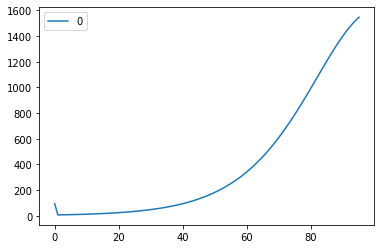

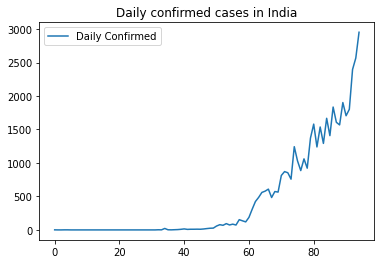

In [0]:


india_daily_cases.plot()
plt.title("Daily confirmed cases in India")


Text(0.5, 1.0, 'Total confirmed cases in India')

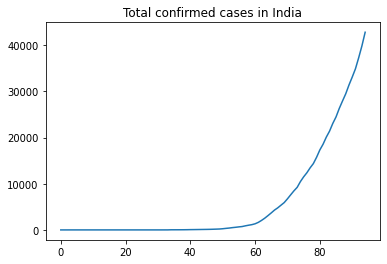

In [0]:
cases_ts_data['Total Confirmed'].plot()
plt.title("Total confirmed cases in India")

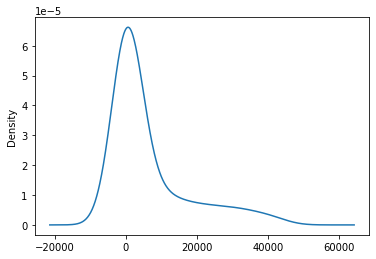

In [0]:
cases_ts_data['Total Confirmed'].plot(kind='kde')

# Using Logistic Growth formula

In [0]:
def logistic_growth(t,a,b,c):
  return c/(1 + a * np.exp(-b*t) )

In [0]:

'''here a = random coefficent
        b = rate of infection => how many persons a infected patient can infect
        c = maximum number of cases possible in the region 
'''
'''p0 represents initial values for the 3 variables a, b, c
    bounds represents the minimum and maximum values for the variables
'''


p0 = np.random.exponential(size = 3)
bounds = [0,[1000., 3., 1000000000.]]

In [0]:
import scipy.optimize as optim
x = np.arange(len(cases_ts_data['Total Confirmed'])) 
y = np.array(cases_ts_data['Total Confirmed'])
(a,b,c), cov = optim.curve_fit(logistic_growth, x, y, bounds = bounds, p0 = p0)

In [0]:
print(a,b,c)

999.9999979647995 0.06867582801489014 94059.54478587068


## The model is predicting maximum of 94059 cases in India

In [0]:
# The time step at which the growth is fastest
t_fastest = np.log(a) / b
t_fastest

100.5849580066106

## highest no of cases in a single day will be recored on 101st day

In [0]:
len(cases_ts_data['Total Confirmed']) # the no of days since the pandemic started in India

95

### Showing the plot for fro next 90 days

In [5]:
x_test = np.arange(len(cases_ts_data['Total Confirmed']) + 90 )

In [6]:
def my_logistic(t):
  return c/(1 + a * np.exp(-b*t) )

Text(0.5, 1.0, 'Model prediction for next 90 days In India')

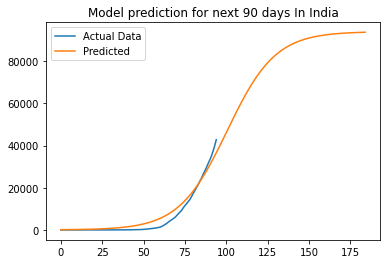

In [0]:
y_pred = my_logistic(x_test)
cases_ts_data['Total Confirmed'].plot()
plt.plot(x_test, y_pred)   #predicted
plt.legend(['Actual Data','Predicted'])
plt.title("Model prediction for next 90 days In India")


In [0]:
print(y_pred[101] - y_pred[100])

1614.7318839455693


### Showing the predicted data on the interactive plotting using plotly and cufflinks

In [4]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
%matplotlib inline

#### Intetactive plots will be visible on fresh run, since it works on Javascript

In [9]:

pd.DataFrame(y_pred).iplot()

### plot showing the days for each 10k cases

In [10]:
pd.DataFrame(y_pred).scatter_matrix()

## Pedicting the cases for next 200 days

Text(0.5, 1.0, 'Model prediction for next 200 days In India')

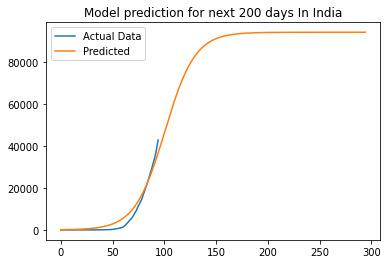

In [0]:
x_test = np.arange(len(cases_ts_data['Total Confirmed']) + 200 )
y_pred = my_logistic(x)
cases_ts_data['Total Confirmed'].plot()
plt.plot(x_test, y_pred)   #predicted
plt.legend(['Actual Data','Predicted'])
plt.title("Model prediction for next 200 days In India")


### Plot showing no of days for each 10k cases

In [15]:
pd.DataFrame(y_pred).scatter_matrix() 

## Ploting the daily confirmed cases and predicted cases in India

In [0]:
daily = [0]
for i in range(1, len(y)):
  daily.append(y[i] - y[i-1] )
daily 
change = []
for i in range(len(daily) - 1):
  change.append(daily[i+1] - daily[i])
change.append(change[-1])
rate = []
for i in range(len(daily)-1):
  rate.append(change[i+1]/change[i])
print(max(rate))

print(max(daily)) # maximum daily highest no of cases 


3.3996128421311265
1614.7318839455693


Text(0.5, 1.0, 'Predicted Daily cases in India')

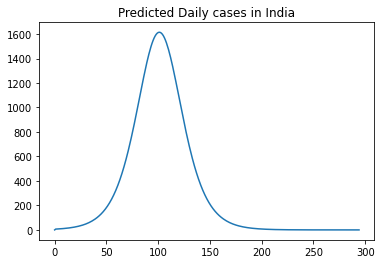

In [0]:
pd.DataFrame(daily).plot(legend=None)
plt.title("Predicted Daily cases in India")

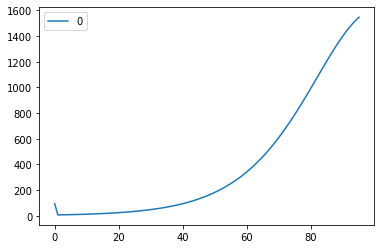

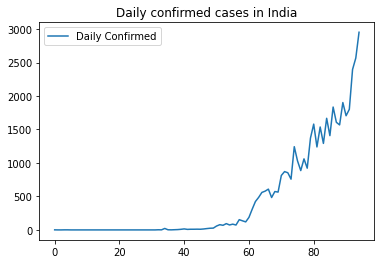

In [0]:
pd.DataFrame(daily[0:96]).plot()
india_daily_cases.plot()
plt.title("Daily confirmed cases in India")
plt.show()

World wide  Corona cases Dataset 

In [0]:
world_ds = pd.read_csv("/content/time_series_covid_19_confirmed.csv")
world_ds.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27


In [0]:
china = world_ds[world_ds["Country/Region"] == "China"]
china = china[china['Province/State'] == 'Hubei']
china = china.iloc[:, 4:]
china = china.T

### Plotting the China-Hubei data

Text(0.5, 1.0, 'Total confirmed cases in China-hubei')

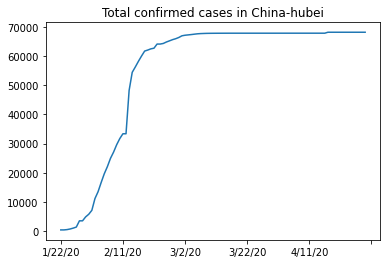

In [0]:
china.plot(legend=None)
plt.title("Total confirmed cases in China-hubei")


### Building the model for predicting the number of cases in china

In [0]:
def logistic_growth_china(t,d,e,f):
  return f/(1 + d * np.exp(-e*t) )

In [0]:
p0_china = np.random.exponential(size = 3)
bounds_china = [0,[100000., 3., 10000000000.]]

In [0]:
x_china = np.arange(len(china)) 
y_china = np.array(china.values.reshape(len(china)))
(d,e,f), cov = optim.curve_fit(logistic_growth_china, x_china, y_china, bounds = bounds_china, p0 = p0_china)

In [0]:
print(d, e ,f)

79.6951780122634 0.23398604979995227 67835.71302118413


In [0]:
def my_logistic_china(t):
  return f/(1 + d * np.exp(-e*t) )

Text(0.5, 1.0, 'Actual vs Predicted data for china')

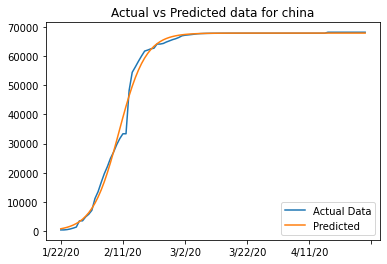

In [0]:
x_test_china = np.arange(len(china))
y_pred_china = my_logistic_china(x_test_china)
china.plot(legend=None)
plt.plot(x_test_china, y_pred_china)   #predicted
plt.legend(['Actual Data','Predicted'])
plt.title("Actual vs Predicted data for china")


In [0]:
# The time step at which the growth is fastest
t_fastest = np.log(d) / e
t_fastest

18.71141072718161

In [0]:
daily_china = [0]
for i in range(1, len(y_pred_china)):
  daily_china.append(y_pred_china[i] - y_pred_china[i-1] )

print(max(daily_china)) # maximum daily highest number of cases

3961.217193460896


Text(0.5, 1.0, 'Daily predicted cases in China-Hubei')

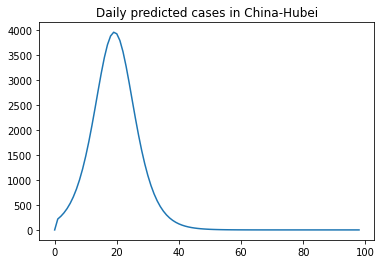

In [0]:
pd.DataFrame(daily_china).plot(legend=None)
plt.title("Daily predicted cases in China-Hubei")

In [0]:
y_china[2]-y_china[1]

105

Text(0.5, 1.0, 'daily confirmed cases in China-Hubei')

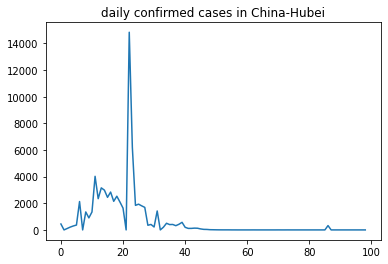

In [0]:
daily_china_act = [y_china[0]]
for i in range(1, len(y_china)):
  daily_china_act.append(y_china[i] - y_china[i-1] )

pd.DataFrame(daily_china_act).plot(legend=None)
plt.title("daily confirmed cases in China-Hubei")

In [0]:
print(china)

            62
1/22/20    444
1/23/20    444
1/24/20    549
1/25/20    761
1/26/20   1058
...        ...
4/25/20  68128
4/26/20  68128
4/27/20  68128
4/28/20  68128
4/29/20  68128

[99 rows x 1 columns]


## Building the logistic growth for US on confirmed cases

In [0]:
us_ds = world_ds[world_ds["Country/Region"] == "US"]
us_ds = us_ds.iloc[:, 4:]
us_ds = us_ds.T

In [0]:
def logistic_growth_us(t3,a3,b3,c3):
  return c3/(1 + a3 * np.exp(-b3*t3) )

In [0]:
p0_us = np.random.exponential(size = 3)
bounds_us = [0,[1000.,13., 100000000000.]]

In [0]:
x_us = np.arange(len(us_ds)) 
y_us= np.array(us_ds.values.reshape(len(us_ds)))
(a3,b3,c3), cov = optim.curve_fit(logistic_growth_us, x_us, y_us, bounds = bounds_us, p0 = p0_us)

In [0]:
print(a3, b3, c3)

999.9999999999999 0.07373867817393462 1820451.1123652447


## Maximum no of cases in US will be 1820451

In [0]:
def my_logistic_us(t):
  return c3/(1 + a3 * np.exp(-b3*t) )

### Plotting actual vs predicted data for US

Text(0.5, 1.0, 'Actual vs Predicted data for US')

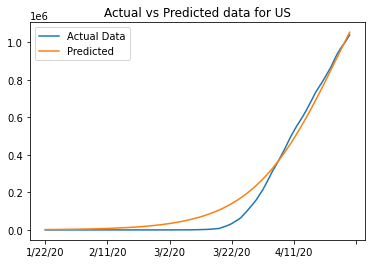

In [0]:
x_test_us = np.arange(len(us_ds))
y_pred_us = my_logistic_us(x_test_us)
us_ds.plot(legend=None)
plt.plot(x_test_us, y_pred_us)   #predicted
plt.legend(['Actual Data','Predicted'])
plt.title("Actual vs Predicted data for US")


## forecasting cases for next 200 days

Text(0.5, 1.0, 'Actual vs Predicted data for US')

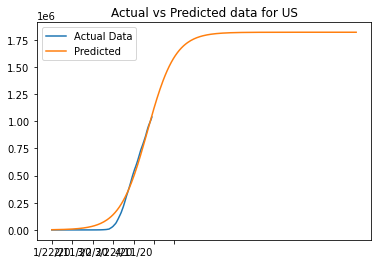

In [0]:
x_test_us = np.arange(len(us_ds)+200)
y_pred_us = my_logistic_us(x_test_us)
us_ds.plot(legend=None)
plt.plot(x_test_us, y_pred_us)   #predicted
plt.legend(['Actual Data','Predicted'])
plt.title("Actual vs Predicted data for US")

In [0]:
# The time step at which the growth is fastest
t_fastest = np.log(a3) / b3
t_fastest

93.6788595896463

In [0]:
daily_us = [y_pred_us[0]]
for i in range(1, len(y_pred_us)):
  daily_us.append(y_pred_us[i] - y_pred_us[i-1] )

print(max(daily_us)) # maximum no fo cases in a single day

33554.15493529441


Text(0.5, 1.0, 'Daily confirmed cases in US')

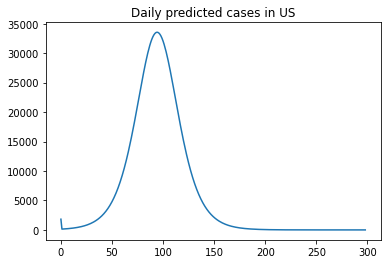

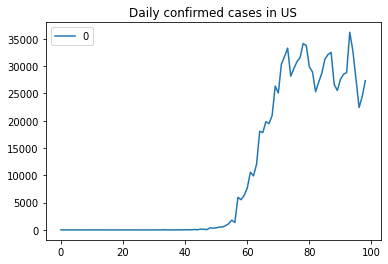

In [0]:
pd.DataFrame(daily_us).plot(legend=None)
plt.title("Daily predicted cases in US")
daily_us_act = [y_us[0]]
for i in range(1, len(y_us)):
  daily_us_act.append(y_us[i] - y_us[i-1] )

pd.DataFrame(daily_us_act).plot()
plt.title("Daily confirmed cases in US")

# State Wise in India

# Telangana sate cases

In [0]:
state_wise_data = pd.read_csv("/content/state_wise_daily.csv")
state_wise_data.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0.0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0.0,18,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0


In [0]:
state_wise_data = state_wise_data[state_wise_data['Status'] ==  'Confirmed']
tg_ds = state_wise_data['TG']


In [0]:
tg_total = [tg_ds.iloc[0]]
for i in range(len(tg_ds)-1):
  tg_total.append(tg_total[i] + tg_ds.iloc[i+1])

Text(0.5, 1.0, 'Confirmed Cases in Telangana')

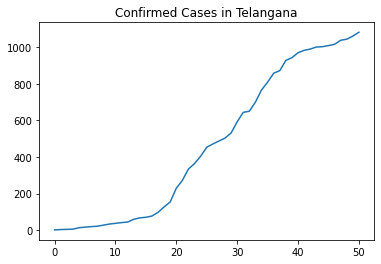

In [0]:
pd.DataFrame(tg_total).plot(legend=None)
plt.title("Confirmed Cases in Telangana")

In [0]:
def logistic_growth_ts(t4,a4,b4,c4):
  return c4/(1 + a4 * np.exp(-b4*t4) )

In [0]:
p0_ts = np.random.exponential(size = 3)
bounds_ts = [0,[1000.,3., 100000000000.]]

In [0]:
x_ts = np.arange(len(tg_total)) 
y_ts= np.array(tg_total)
(a4,b4,c4), cov = optim.curve_fit(logistic_growth_ts, x_ts, y_ts, bounds = bounds_ts, p0 = p0_ts)

In [0]:
print(a4, b4, c4)

115.99055618734754 0.16705913706383033 1087.7173270788028


## Maximum no of cases in Telangana will be 1087

In [0]:
def my_logistic_tg(t4):
  return c4/(1 + a4 * np.exp(-b4*t4) )

Text(0.5, 1.0, 'Actual vs Predicted data for Telangana State')

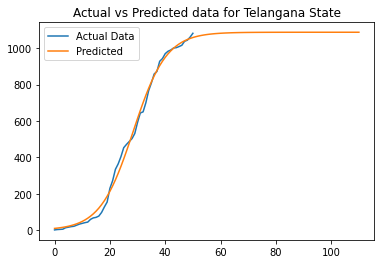

In [0]:
x_test_tg = np.arange(len(tg_total)+60)
y_pred_tg = my_logistic_tg(x_test_tg)
pd.DataFrame(tg_total).plot(legend=None)
plt.plot(x_test_tg, y_pred_tg)   #predicted
plt.legend(['Actual Data','Predicted'])
plt.title("Actual vs Predicted data for Telangana State")

In [0]:
# The time step at which the growth is fastest
t_fastest = np.log(a4) / b4
t_fastest

28.454046152928168

In [0]:
daily_tg = [0]
for i in range(1, len(y_pred_tg)):
  daily_tg.append(y_pred_tg[i] - y_pred_tg[i-1] )

print(max(daily_tg))  # single day highest cases

45.401244016288274


Text(0.5, 1.0, 'Daily confirmed cases in Telangana')

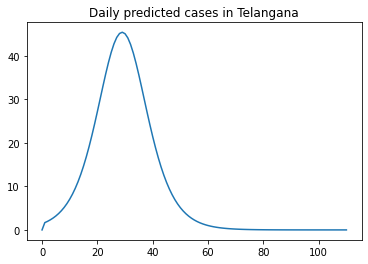

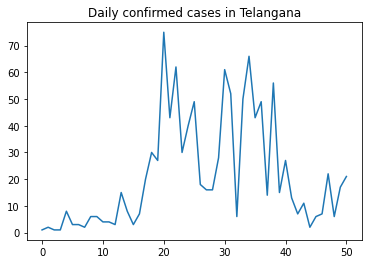

In [0]:
pd.DataFrame(daily_tg).plot(legend=None)
plt.title("Daily predicted cases in Telangana")
daily_ts_act = [y_ts[0]]
for i in range(1, len(y_ts)):
  daily_ts_act.append(y_ts[i] - y_ts[i-1] )

pd.DataFrame(daily_ts_act).plot(legend=None)
plt.title("Daily confirmed cases in Telangana")

In [0]:
ap_ds = state_wise_data['AP']

In [0]:
ap_total = [ap_ds.iloc[0]]
for i in range(len(ap_ds)-1):
  ap_total.append(ap_total[i] + ap_ds.iloc[i+1])

Text(0.5, 1.0, 'Confirmed Cases in Andhrapradesh')

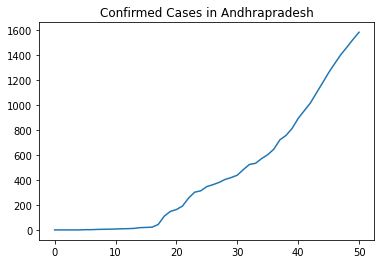

In [0]:
pd.DataFrame(ap_total).plot(legend=None)
plt.title("Confirmed Cases in Andhrapradesh")

In [0]:
def logistic_growth_ap(t5,a5,b5,c5):
  return c5/(1 + a5 * np.exp(-b5*t5) )

In [0]:
p0_ap = np.random.exponential(size = 3)
bounds_ap = [0,[100000.,3., 10000000000.]]

In [0]:
x_ap = np.arange(len(ap_total)) 
y_ap= np.array(ap_total)
(a5,b5,c5), cov = optim.curve_fit(logistic_growth_ap, x_ap, y_ap, bounds = bounds_ap, p0 = p0_ap)

In [0]:
print(a5,b5,c5)

122.44341082270843 0.10479467236381863 2611.27950883335


## Maximum no of cases in AP will be 2611

In [0]:
def my_logistic_ap(t):
  return c5/(1 + a5 * np.exp(-b5*t) )

Text(0.5, 1.0, 'Actual vs Predicted data for Andhrapradesh State')

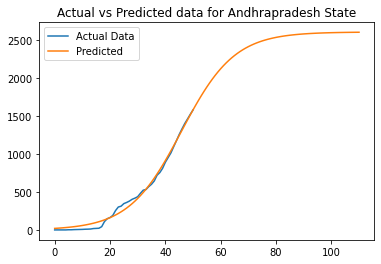

In [0]:
x_test_ap = np.arange(len(ap_total))
y_pred_ap = my_logistic_ap(x_test_ap)
pd.DataFrame(ap_total).plot(legend=None)
plt.plot(x_test_ap, y_pred_ap)   #predicted
plt.legend(['Actual Data','Predicted'])
plt.title("Actual vs Predicted data for Andhrapradesh State")

In [0]:
# The time step at which the growth is fastest
t_fastest = np.log(a5) / b5
t_fastest

45.876845285544015

In [0]:
daily_ap = [0]
for i in range(1, len(y_pred_ap)):
  daily_ap.append(y_pred_ap[i] - y_pred_ap[i-1] )

print(max(daily_ap)) # daily maximum highest 

68.36975543293102


Text(0.5, 1.0, 'Daily confirmed cases in Andhrapradesh')

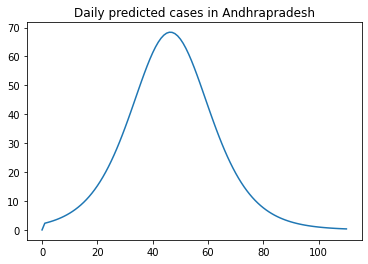

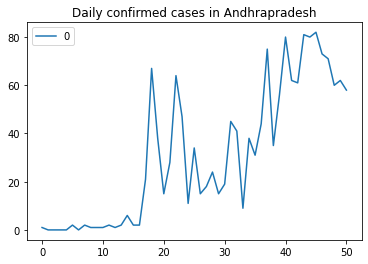

In [0]:
pd.DataFrame(daily_ap).plot(legend=None)
plt.title("Daily predicted cases in Andhrapradesh")
daily_ap_act = [y_ap[0]]
for i in range(1, len(y_ap)):
  daily_ap_act.append(y_ap[i] - y_ap[i-1] )

pd.DataFrame(daily_ap_act).plot()
plt.title("Daily confirmed cases in Andhrapradesh")